<a href="https://colab.research.google.com/github/Mikuzenotaku/MLnow_2.0/blob/main/Univariate_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Date-6.06.2021**

***Author***-Prashanti Garnaik

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd/content/drive/MyDrive/Colab Notebooks/02_EDA

/content/drive/MyDrive/Colab Notebooks/02_EDA


In [ ]:
ls

02_EDA.ipynb         student-merge.R     student.txt
cleanedMathData.csv  student-por.csv     student.zip
student-mat.csv      student-por.gsheet  univariate_MathData_2.csv


In [ ]:
import os

In [ ]:
import pandas as pd #working with csv and excel files
import numpy as np#working withnumbers/arreys/tensors
import tensorflow as tf #framework
from tensorflow import keras#API/Library
import os #usin os command between the python language

In [ ]:
mathData=pd.read_csv('student-mat.csv',sep=';')#load the csv file as dataframe

In [ ]:
mathData.head(10)#print the first ten rows of the data frame

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


We are going to consider the columns 'G1' and 'G3' for univeriate linear regression

$G3_i=G1_i\cdot\theta_1+\theta_0$

In [ ]:
uniMathData=mathData[['G1','G3']]
uniMathData.head(5)

,G1,G3
0,5,6
1,5,6
2,7,10
3,15,15
4,6,10


In [ ]:
uniMathData.to_csv('univariate_MathData_2.csv')

In [ ]:
ls

02_EDA.ipynb         student-merge.R     student.txt
cleanedMathData.csv  student-por.csv     student.zip
student-mat.csv      student-por.gsheet  univariate_MathData_2.csv


***Data visualization***



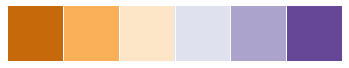

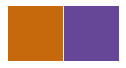

In [ ]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr'))#purple to orange colors
pal=sns.color_palette('PuOr',6)#print 6 color shades from purple to orange
pal.as_hex()#set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors=['#c6690c','#664697']#orange purple hex codes
sns.set_palette(sns_colors)#set the palette as sns_colors
sns.palplot(sns.color_palette(sns_colors))#plot the color codes

In [ ]:
uniMathData.columns#columns in the data frame

Index(['G1', 'G3'], dtype='object')

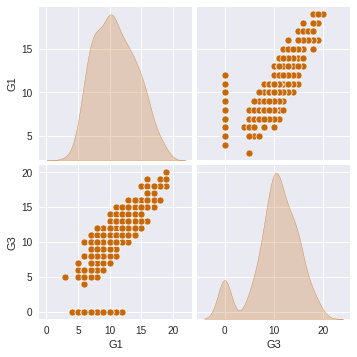

In [ ]:
#pairplot for all the values

sns.pairplot(uniMathData,
             x_vars=['G1','G3'],
             y_vars=['G1','G3'],
             diag_kind='kde'
             )


***Data Splits***

In [ ]:
#80-20 train-test percent split

trainDataset=uniMathData.sample(frac=0.8,random_state=0)
testDataset=uniMathData.drop(trainDataset.index)


print(trainDataset.head())
print(testDataset.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [ ]:
print(trainDataset.shape)
print(testDataset.shape)

(316, 2)
(79, 2)


In [ ]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [ ]:
#removing the G3 column and saving it into the labels variable

trainLabels=trainFeatures.pop('G3')
testLabels=testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [ ]:
print(trainFeatures.head())
print(testFeatures.head())

     G1
329  14
318  11
317   9
65   16
59   15
    G1
9   14
25   6
28  11
31  17
32  17


In [ ]:
#univariate ->num(features)=1
#multvariate ->num(features) >1=11


model=tf.keras.Sequential([
                           tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(
    loss='mean_absolute_error',#minimizing the MAE Loss
    optimizer=tf.keras.optimizers.Adam(0.001),#Learning rate specified as 0.01
    #optimizer='adam',#takes the default learning rate 
    metrics=['mae','mse']#meanSqyare and meanAbsolute error metrics
)

In [ ]:
numEpochs=300
history=model.fit(x=trainFeatures,y=trainLabels,validation_data=(testFeatures,testLabels),epochs=numEpochs)

Epoch 1/300
10/10 [==============================] - 0s 15ms/step - loss: 4.4706 - mae: 4.4706 - mse: 22.7911 - val_loss: 4.3859 - val_mae: 4.3859 - val_mse: 21.4287
Epoch 2/300
10/10 [==============================] - 0s 3ms/step - loss: 4.3697 - mae: 4.3697 - mse: 21.8682 - val_loss: 4.2789 - val_mae: 4.2789 - val_mse: 20.4420
Epoch 3/300
10/10 [==============================] - 0s 3ms/step - loss: 4.2711 - mae: 4.2711 - mse: 21.0057 - val_loss: 4.1711 - val_mae: 4.1711 - val_mse: 19.4806
Epoch 4/300
10/10 [==============================] - 0s 3ms/step - loss: 4.1708 - mae: 4.1708 - mse: 20.1478 - val_loss: 4.0638 - val_mae: 4.0638 - val_mse: 18.5561
Epoch 5/300
10/10 [==============================] - 0s 3ms/step - loss: 4.0707 - mae: 4.0707 - mse: 19.3226 - val_loss: 3.9574 - val_mae: 3.9574 - val_mse: 17.6725
Epoch 6/300
10/10 [==============================] - 0s 5ms/step - loss: 3.9730 - mae: 3.9730 - mse: 18.5421 - val_loss: 3.8506 - val_mae: 3.8506 - val_mse: 16.8185
Epoch 7/3

In [ ]:
print(history)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


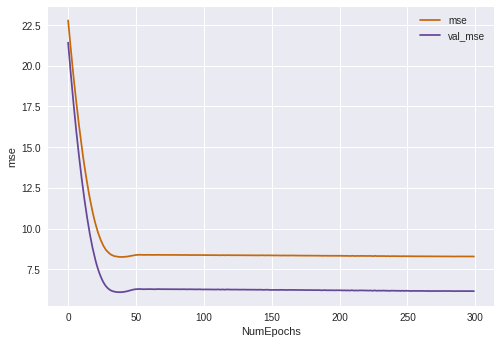

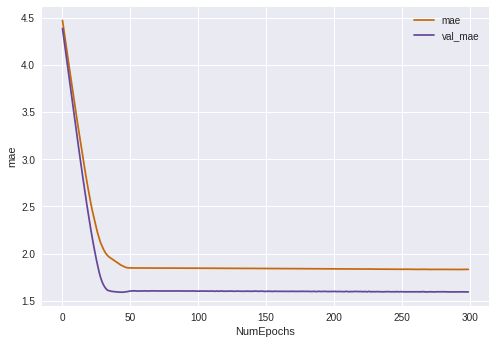

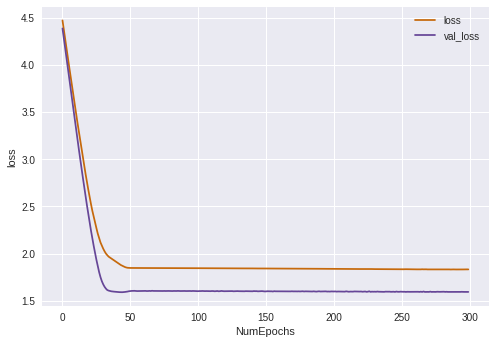

In [ ]:
#tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')


In [ ]:
model.predict([1])

array([[1.0019193]], dtype=float32)

In [ ]:
#testPreds=model.predict(testFeatures).flatten()#array of all prediction values

#for single  values

print(f'Prediction for input value 1:{model.predict([1])}')

#for a list of values
tempListforPreds=[1,2,3,4,5]
print(f'''
input List = {tempListforPreds}

List of Predictions:
{model.predict(tempListforPreds)}
List of Predicions(flattend out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1:[[1.0019193]]

input List = [1, 2, 3, 4, 5]

List of Predictions:
[[1.0019193]
 [2.0015197]
 [3.0011199]
 [4.0007205]
 [5.0003204]]
List of Predicions(flattend out):
[1.0019193 2.0015197 3.0011199 4.0007205 5.0003204]



In [ ]:
print(testFeatures)

     G1
9    14
25    6
28   11
31   17
32   17
..   ..
365  10
367   7
379  10
381   7
393  11

[79 rows x 1 columns]


In [ ]:
testPreds=model.predict(testFeatures).flatten()#array of all prediction values

In [ ]:
print(len(testPreds))
print(testPreds)

79
[13.996724   5.999921  10.997923  16.995525  16.995525  11.997523
 13.996724  18.994726  18.994726   7.9991217 13.996724  12.997124
  7.9991217  6.9995213  8.998722  12.997124  10.997923  15.995925
  6.9995213  9.9983225 14.996325  12.997124  13.996724  15.995925
  6.9995213  6.9995213  7.9991217  9.9983225 11.997523   9.9983225
 11.997523  12.997124   9.9983225  5.999921   8.998722  11.997523
  6.9995213  7.9991217 13.996724   8.998722   8.998722   6.9995213
 11.997523   5.999921  12.997124   6.9995213  6.9995213 10.997923
 12.997124  16.995525  11.997523  14.996325   8.998722  11.997523
 14.996325  11.997523  14.996325  11.997523  14.996325  10.997923
 11.997523   7.9991217 15.995925   6.9995213 15.995925  10.997923
 15.995925  12.997124   7.9991217  7.9991217 11.997523  17.995125
 12.997124  15.995925   9.9983225  6.9995213  9.9983225  6.9995213
 10.997923 ]


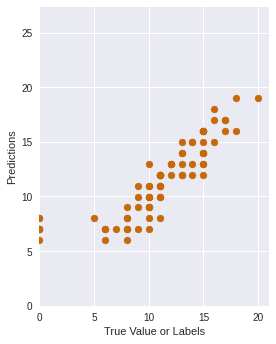

In [ ]:
#prediction plot -->how well is your model predicting across the actual label

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)


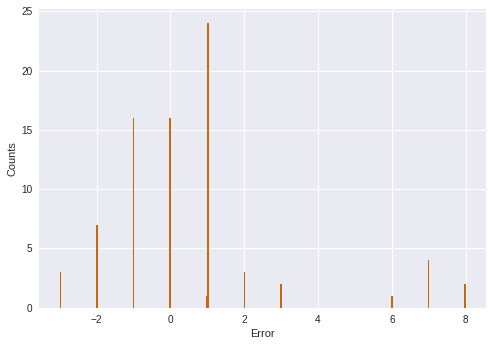

In [ ]:
#error plot-->gaussian distribution
def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)